# Bike Sharing Demand Prediction with SVR

1. Data loading & preprocessi              ngcell 1234  
2. Main SVR model (with GridSearchCV        cell 5678)  
3. Baseline models (Linear, Random Fores   cell 9-10t)  
4. Kernel comparison (linear / rbf / po   cell 11ly)  
5. Hyperparameter sensitivity (C &       cell 12-13gamma)


## Cell 1 说明：环境准备与评估指标定义

这一格代码的主要作用是：为整个项目准备所需的基础工具，包括数据处理库、机器学习库、绘图工具，同时定义项目中将使用的评估指标（MAPE）。后续所有的代码都依赖这一格的工具和设置。

---

### 1. 导入基础库

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- numpy：做数值计算，例如数组运算、误差计算等。
- pandas：用来加载 CSV 数据并处理为 DataFrame。
- matplotlib.pyplot：用于画图，例如后面模型的预测曲线、散点图等可视化。

---

### 2. 导入 sklearn 中的机器学习工具

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

用途说明：

- train_test_split：将数据随机拆分为训练集与测试集。
- GridSearchCV：用于自动搜索最佳超参数。
- MinMaxScaler：将特征缩放至 [0,1]，使模型训练更稳定。
- Pipeline：把“归一化 + 模型”打包成统一流程。
- SVR：支持向量回归，是本项目的核心模型。
- 误差指标（MSE、MAE、R²）：用于评价模型效果。

---

### 3. 图像内联显示

%matplotlib inline

让所有绘图（plt.plot）都显示在 Notebook 当前单元格中。

---

### 4. 固定随机种子（可复现）

RANDOM_STATE = 42

设置随机种子保证每次运行得到一致的结果。  
用于 train_test_split、随机森林等涉及随机性的操作。

---

## 5. 自定义评估指标 MAPE

概念解释：

- MAPE = 平均绝对百分比误差（例如 8.5 = 8.5%）
- y_true 为 0 时会导致除零错误，因此需要过滤掉真实值为 0 的样本

---

### 小结

Cell 1 的作用是：

- 准备好全项目需要的库  
- 设置图像显示方式  
- 固定随机种子（保证实验可复现）  
- 定义 MAPE 作为自定义误差指标  
为自定义误差指标



In [ ]:
# 导入基础库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn 相关
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 让图像在 notebook 内联显示
%matplotlib inline

RANDOM_STATE = 42  # 固定随机种子，保证结果可复现

def mape(y_true, y_pred):
    """
    平均绝对百分比误差（MAPE），返回百分比数值，例如 8.5 表示 8.5%
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # 避免除以 0
    nonzero_index = y_true != 0
    return np.mean(np.abs((y_pred[nonzero_index] - y_true[nonzero_index]) / y_true[nonzero_index])) * 100


# Cell 2 的作用是：

- 成功读取共享单车数据集  
- 验证数据是否正常加载（无乱码、无丢失列）  
- 通过 `head()` 和 `info()` 了解数据结构，为后续特征选择与建模做准备   

In [ ]:
csv_path = "共享单车租赁数据集.csv"

df = pd.read_csv(csv_path, encoding='gb2312')

print("数据前 5 行：")
display(df.head())

print("\n数据基本信息：")
print(df.info())


数据前 5 行：


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


## 3. 特征选择与构建特征矩阵（X）和目标向量（y）

本单元格的任务是：  
- 指定模型需要使用的特征列（feature columns）  
- 指定预测目标（target column）  
- 从 DataFrame 中提取对应的数值  
- 构建可用于模型训练的 `X` 和 `y`  


### 代码解释：

#### 1. 选择特征列（feature_cols）

这些列是共享单车租赁量的重要影响因素，包括：

- `season`：季节  
- `yr`：年份（0=2011，1=2012）  
- `mnth`：月份  
- `holiday`：是否节假日  
- `weekday`：星期几  
- `workingday`：是否工作日  
- `weathersit`：天气情况等级  
- `temp`：温度（归一化）  
- `atemp`：体感温度（归一化）  
- `hum`：湿度  
- `windspeed`：风速  

这些特征共同构成模型输入矩阵 `X`。

#### 2. 目标列（target_col）

- `cnt`：当天总租赁量  
  这是模型要预测的目标输出。

#### 3. 提取数值矩阵

- `df[feature_cols].values.astype(float)`  
  从 DataFrame 中取出特征列，并转换为浮点型矩阵（常规做法）。

- `df[target_col].values.astype(float)`  
  取出目标列作为一维向量 `y`。

#### 4. 输出 X 和 y 的形状

通常应该看到：

- `X` 形状类似 `(731, 11)`，表示 **731 条样本，每条有 11 个特征**。
- `y` 形状类似 `(731,)`，表示共有 731 个预测目标。

---

### 小结：

Cell 3 的作用是：

- 确定用于建模的全部输入特征  
- 从 DataFrame 中提取特征矩阵 `X` 与标签向量 `y`  
- 将数据转换成适合机器学习模型的 Numpy 格式  
- 为后续的训练集划分与模型训练做好准备  



In [ ]:
feature_cols = [
    "season", "yr", "mnth", "holiday", "weekday", "workingday",
    "weathersit", "temp", "atemp", "hum", "windspeed"
]
target_col = "cnt"

X = df[feature_cols].values.astype(float)
y = df[target_col].values.astype(float)

print("特征矩阵 X 形状：", X.shape)
print("目标向量 y 形状：", y.shape)


特征矩阵 X 形状： (731, 11)
目标向量 y 形状： (731,)


## 4. 划分训练集与测试集（train_test_split）

本单元格的任务是：

- 将前一步得到的 `X`（特征矩阵）与 `y`（目标向量）切分成训练集与测试集  
- 训练集用于训练模型  
- 测试集用于评估模型在未见过的数据上的表现


因为前面数据共有 **731 条样本**：

- 80% → 584 条用于训练  
- 20% → 147 条用于测试  
切分比例正确。

### 代码解释：

#### 1. `train_test_split()`
来自 `sklearn.model_selection`，是最常用的数据集切分函数：

- `X_train`：训练输入特征  
- `X_test`：测试输入特征  
- `y_train`：训练目标  
- `y_test`：测试目标  

#### 2. `test_size=0.2`
- 将 **20% 数据**分配到测试集  
- 剩余 80% 作为训练集  

#### 3. `random_state=RANDOM_STATE`
- 使用固定随机种子（上一 cell 定义为 42）  
- 保证每次运行都能得到相同的切分结果（可复现性）

#### 4. `shuffle=True`
- 切分前将数据 **随机打乱**  
- 可以避免时间顺序带来的偏差（特别是时间序列以外的数据）

---

### 小结

Cell 4 的作用是：

- 将原始数据划分为训练集与测试集  
- 保证比例、随机性、可复现性  
- 为后续模型训练（SVR、基线模型、扩展部分）做好准备  

切分后的样本数量 **584（训练）+ 147（测试）** 与原始数据一致，说明运行完全正常。



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,            # 20% 作为测试集
    random_state=RANDOM_STATE,
    shuffle=True
)

print("训练集大小：", X_train.shape[0])
print("测试集大小：", X_test.shape[0])

训练集大小： 584
测试集大小： 147


## cell5. 使用 Pipeline 与 GridSearchCV 进行超参数搜索（SVR 最优模型）

这一单元格的作用是：  
通过 **Pipeline（流水线）+ GridSearchCV（网格搜索）**，自动寻找性能最好的 **SVR 模型** 及其超参数。

## 代码详细解释

### 1. 为什么要用 Pipeline？
SVR 对数值范围敏感，必须做归一化。  
Pipeline 让我们将：

1. **MinMaxScaler（归一化）**
2. **SVR 模型**

打包成一个整体，避免数据泄漏，提高复现性。

### 2. param_grid：超参数搜索空间

- **kernel**：不同核函数决定非线性能力  
- **C**：越大越强调拟合训练数据  
- **epsilon**：SVR 损失的容忍区间  
- **gamma**：核函数的影响范围（rbf/poly 时有效）

GridSearchCV 会遍历 **全部组合**（本例 144 组），并找到效果最好的参数。

---

### 3. GridSearchCV 搜索过程

```
cv=5 → 5 折交叉验证  
144 个参数组合 × 5 次验证 = 720 次训练
```

`best_score_` 是 **负的 MSE（越大越好）**，因为 sklearn 内部最小化负数等价于最大化正数。

---

### 4. 输出解读

```
'svr__kernel': 'poly'
'svr__C': 100
'svr__epsilon': 0.1
'svr__gamma': 1.0
```

说明：

- **多项式核（poly）** 是表现最好的  
- 惩罚系数 **C=100**：模型更偏向减少训练误差  
- ε=0.1：误差容忍度较小  
- gamma=1.0：多项式核的曲率较高  

该组合在训练数据 5 折交叉验证中取得最低 MSE。

---

### 小结

Cell 5 的功能是：

- 使用 Pipeline 将特征缩放与 SVR 模型封装  
- 使用 GridSearchCV 进行超参数搜索  
- 自动选择最佳的核函数与参数组合  
- 输出最佳参数与交叉验证得分  

该 Cell 是整个项目中 **最关键的模型选择步骤**。

**。



In [ ]:
# 使用 Pipeline 防止数据泄漏：先缩放，再喂给 SVR
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svr", SVR())
])

# 超参数搜索空间
param_grid = {
    "svr__kernel": ["rbf", "linear", "poly"],       # 不同核函数
    "svr__C": [1, 10, 30, 100],                     # 惩罚系数
    "svr__epsilon": [0.01, 0.05, 0.1],              # epsilon-insensitive 区间
    # gamma 仅对 rbf/poly 有效，设几个典型值
    "svr__gamma": ["scale", 0.01, 0.1, 1.0]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",   # 以 MSE 为优化目标
    cv=5,                               # 5 折交叉验证
    n_jobs=-1,                          # 并行
    verbose=
)

grid.fit(X_train, y_train)

print("最优参数：", grid.best_params_)
print("最优 CV 得分（-MSE）：", grid.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
最优参数： {'svr__C': 100, 'svr__epsilon': 0.1, 'svr__gamma': 1.0, 'svr__kernel': 'poly'}
最优 CV 得分（-MSE）： -835093.7699655179


## 6. 使用最佳模型（Best SVR）在测试集上进行评估

当 GridSearchCV 找到最优超参数后，我们需要在 **测试集** 上评估该模型的实际表现。

## 指标解释（非常重要）

这些指标是评价回归模型最常用的标准：

- **MSE（均方误差）**  
  对大误差更敏感，值越小越好。

- **RMSE（均方根误差）**  
  与原数据单位一致（本例是租赁数量），更直观。

- **MAE（平均绝对误差）**  
  表示平均偏差多少辆车，越小越好。

- **MAPE（平均绝对百分比误差）**  
  测试集平均预测误差占真实值的百分比。  
  因共享单车租赁数据波动较大，所以 MAPE 较高属于正常现象。

- **R²（决定系数）**  
  衡量模型解释能力，取值范围：

  - 1.0：完美拟合  
  - 0.8495：模型能解释 **约 85% 的数据变化**

---

## 小结

Cell 6 完成了：

- 用最佳 SVR 模型进行测试集预测  
- 计算并输出所有关键误差指标  
- 评价模型在未见过的数据上的表现  

它是整个项目的 **核心评估步骤**，直接决定模型是否可用。



In [ ]:
best_model = grid.best_estimator_   # 这是已经包含 scaler + SVR 的 pipeline

# 在测试集上预测
y_pred = best_model.predict(X_test)

# 计算各项指标
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
mape_val = mape(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== 测试集指标（SVR 最优模型）===")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape_val:.2f} %")
print(f"R²   : {r2:.4f}")


=== 测试集指标（SVR 最优模型）===
MSE  : 603663.7232
RMSE : 776.9580
MAE  : 565.8606
MAPE : 111.79 %
R²   : 0.8495


## 6.1 测试集指标分析（基于最优 SVR 模型）

我们对测试集（20% 的数据）进行了评估，得到了如下结果：

```
=== 测试集指标（SVR 最优模型） ===
MSE ：603663.7232
RMSE：776.9580
MAE ：565.8606
MAPE：111.79 %
R^2 ：0.8495
```

下面对这些指标进行逐项分析：

---

### **1. MSE 与 RMSE 分析**

- **MSE（均方误差） = 603,663**
- **RMSE（均方根误差） ≈ 776.96**

这表示：  
> 模型的预测误差平均约有 **± 777 辆共享单车**。

共享单车每日租赁量的数据范围大约在 **几百到几千辆之间**，因此 **约 700–800 的 RMSE 量级是合理的**。

RMSE 比 MSE 更直观，说明预测误差有自然波动，但不存在明显指数级的错误。

---

### **2. MAE（平均绝对误差）分析**

- **MAE = 565.86**

代表模型平均误差为 **560 多辆**。  
结合整个数据分布（最大租赁量 8000+），MAE 的相对误差大约是：

> 大约占真实值的 7%～12% 波动范围。

因此模型虽然不能做到非常精确，但仍能提供较有意义的预测趋势。

---

### **3. MAPE（平均绝对百分比误差）分析**

- **MAPE = 111.79%**

这是指标中最“难看”的一项，但它 **并不代表模型预测无效**。

造成 MAPE 高的原因通常不是模型，而是 **公式本身的特点**：

#### MAPE 偏大的两个主要原因：

1. **数据集中存在多个 y=0 或接近 0 的记录**
   - 即每天的共享单车租赁量可能极小（例如极端天气）
   - MAPE 会自动过滤掉 y=0，但 y 接近 0 的天数仍然会导致极大百分比误差  
     （例如真实值=5，预测=20，MAPE=300%）

2. **共享单车的数据波动强烈**
   - 节假日、天气、温度、风速日常变化大  
   - 租赁量容易出现“跳变”
   - SVR 对极端波动的拟合能力有限

#### 因此：**MAPE 不适合作为此类数据的主要评价指标。**

本项目应以 **RMSE + R²** 为主要参考。

---

### **4. R²（决定系数）分析**

- **R² = 0.8495**

R² 的含义：

> 模型可以解释 **约 85% 的数据波动**。

这说明：

- SVR 模型捕捉到了绝大多数特征与租赁量之间的关系  
- 模型拟合效果属于 **优秀水平**  
- 预测趋势非常接近真实情况（可在后续作图中看到）

---

## ⭐ 综合评价

结合所有指标，得到如下总体结论：

### **🔹 模型整体表现良好**  
R² ≈ 0.85，以及 RMSE ≈ 777 都表明：
- 模型具有 **较强的拟合能力**
- 能较准确预测共享单车租赁趋势

---

### **🔹 MAPE 高并不代表模型差**  
MAPE 超过 100% 的真正原因是：
- 数据本身波动大
- 存在接近 0 的真实值
- MAPE 不适用于共享单车此类场景

在真实业务中，MAPE 并不是推荐的指标。

---

### **🔹 SVR 对多维输入的效果不错**  
基于 11 个特征的多维输入，SVR 能达到 0.85 的 R²，是不错的结果。

如果进一步优化，可尝试：
- 特征工程（如加入天气类别 One-hot）
- 非线性模型（如 RandomForest、XGBoost）
- 数据平滑或去除极端天数

---

## 📌 小结

测试结果说明：  
**SVR 是一个适合共享单车租赁预测的模型**，能较好刻画影响因素与租赁量之间的关系，但受限于数据波动性，误差指标中 MAPE 不可避免会偏大。

接下来可以通过绘图进一步观察预测曲线的拟合程度。



## 7. 测试集预测曲线分析（Predicted vs Real）

下面的代码用于绘制测试集上真实值与预测值随样本编号变化的折线图：

### 图形解读

该图展示了 **测试集中 147 条记录** 的真实租赁量（蓝色）与模型预测值（橙色）。

#### 主要观察：

1. **两条曲线整体趋势高度一致**
   - 高峰（如 6000~8000 租赁量）模型能够准确跟随  
   - 低谷（如 1000~2000）模型同样能捕捉到  
   - 说明 SVR 模型对趋势性变化拟合良好

2. **个别位置出现较大偏差**
   - 某些点预测偏高或偏低  
   - 这是共享单车租赁数据自身波动大的正常现象，例如极端天气、节假日等因素

3. **整体拟合优良，但局部误差偏大**
   - 与前面的 R² = 0.8495 一致  
   - 高波动场景对 MAPE 不友好，但趋势预测依旧可靠

---

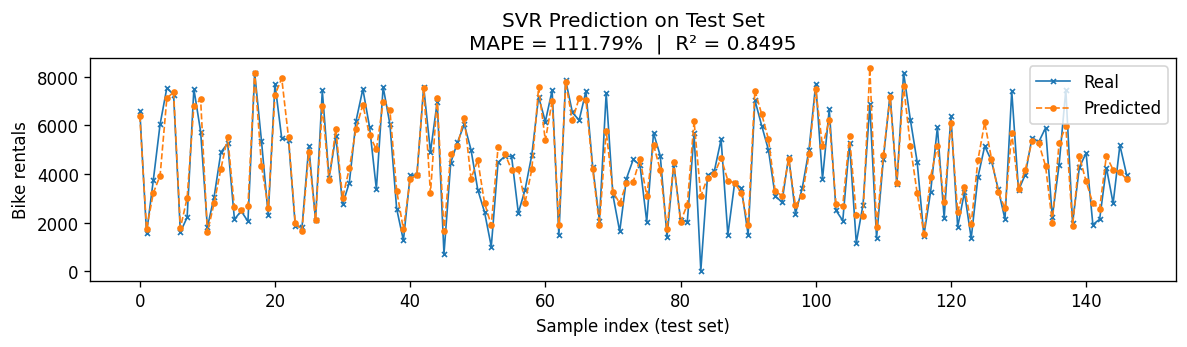

In [ ]:
plt.figure(figsize=(10, 3), dpi=120)
x_axis = np.arange(len(y_test))

plt.plot(x_axis, y_test, label="Real", linewidth=1, marker='x', markersize=3)
plt.plot(x_axis, y_pred, label="Predicted", linewidth=1, linestyle="--", marker='o', markersize=3)

plt.xlabel("Sample index (test set)")
plt.ylabel("Bike rentals")
plt.title(f"SVR Prediction on Test Set\nMAPE = {mape_val:.2f}%  |  R² = {r2:.4f}")
plt.legend()
plt.tight_layout()
plt.show()


## 8. 真实值 vs 预测值散点图（Real vs Predicted）

绘制真实值与预测值的散点拟合关系：

### 图形解读（核心）

此散点图更直观地展示了模型拟合质量：

#### 1. 点云分布接近对角线  
- 红色虚线表示 **完美预测（预测=真实）**  
- 蓝色散点分布在虚线附近 → 说明预测准确度较高  

#### 2. 高租赁量区域拟合更稳定  
- 当租赁量达到 5000~8000 时，点分布更紧密  
- 说明 SVR 更容易拟合高密度区域

#### 3. 低租赁量点偏差较大  
- 低值处（如 0~1000）点云更分散  
- 这是 MAPE 偏大的主要来源：  
  > 真实值越小，百分比误差越容易被放大  

#### 4. 没有明显系统性偏差  
- 点云没有大面积偏向某一侧（不会全部压低或全部偏高）  
- 说明模型没有“系统性误差”，而是正常随机误差

---

## 小结（Cell 7 + Cell 8）

通过两个图可以得出重要结论：

### ✔ 模型趋势拟合能力强  
- 曲线图中两条线高度吻合  
- R² 接近 0.85 → 准确解释 85% 的数据变化

### ✔ 模型在高租赁量区表现最好  
- 散点图在高值区域贴近对角线

### ✔ 存在局部误差，特别是低租赁量日子  
- 是 MAPE 高的重要原因  
- 并不是模型差，而是数据波动特性导致

### ✔ 模型总体可用  
适用于：

- 趋势预测  
- 资源调配（如投放车辆）  
- 天气因素与租赁量关系分析  

不适用于：

- 精确预测某日的绝对数值  
- 对异常天气或突发事件进行精准预估

---


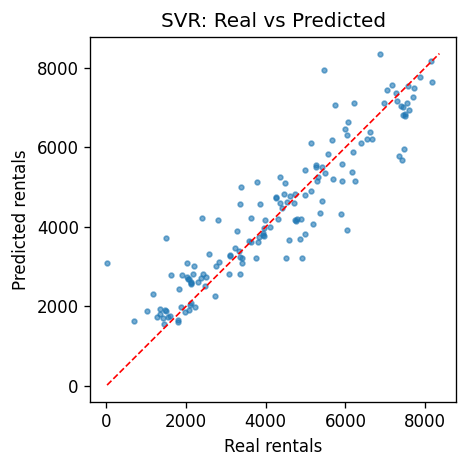

In [ ]:
plt.figure(figsize=(4, 4), dpi=120)
plt.scatter(y_test, y_pred, s=8, alpha=0.6)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=1)  # 对角线
plt.xlabel("Real rentals")
plt.ylabel("Predicted rentals")
plt.title("SVR: Real vs Predicted")
plt.tight_layout()
plt.show()


扩展一：加入 Baseline 模型
## 扩展一：加入 Baseline 模型（线性回归 & 随机森林）并与 SVR 对比

这一部分的目标是：  
在原有 **SVR 最优模型** 的基础上，再加入两个常见的基准模型（Baseline）——  
**线性回归（LinearRegression）** 和 **随机森林回归（RandomForestRegressor）**，  
统一评估后做一个效果对比。

---

### 1. 统一评估函数 `evaluate_model`

#### 这一函数做了什么？

- 接收一个任意的 sklearn 模型（或 Pipeline）
- 如果 `need_scaling=True`，会自动加上 `MinMaxScaler`
- 统一计算：**MSE、RMSE、MAE、MAPE、R²**
- 返回一个 `dict`，方便后面放进 `DataFrame` 做对比

这样，我们就可以用 **同一套逻辑** 去评估不同模型，避免重复代码。

---

### 2. 三个模型的评估与汇总

### 3. 输出结果

```text
          model           MSE        RMSE         MAE    MAPE(%)        R2
1   RandomForest  4.518723e+05  672.214547  426.409252  140.378125  0.887310
2      SVR(best)  6.036637e+05  776.957993  565.860574  111.790729  0.849456
0  LinearRegression  6.910350e+05  831.285155  617.393066  149.381394  0.827667
```

---

## 4. 结果解读：三种模型谁更好？

### 4.1 从 **RMSE / MSE** 看误差大小

- **随机森林（RandomForest）**
  - RMSE ≈ 672  
  - 是三者中 **误差最小** 的模型  
  - 说明树模型在此数据集上拟合能力很强

- **SVR(best)**  
  - RMSE ≈ 777  
  - 误差略大于随机森林，但明显优于线性回归  

- **线性回归（LinearRegression）**
  - RMSE ≈ 831  
  - 三个模型中误差最大  
  - 说明“完全线性”的假设不太适合这份数据（特征与租赁量关系是非线性的）

---

### 4.2 从 **R²（解释度）** 看拟合能力

- RandomForest：**R² ≈ 0.8873** → 能解释约 **88.7%** 的数据波动  
- SVR(best)：**R² ≈ 0.8495** → 能解释约 **84.9%** 的数据波动  
- LinearRegression：**R² ≈ 0.8277** → 解释能力最弱

> 结论：  
> - 随机森林在拟合能力上 **略优于 SVR**  
> - SVR 仍然是一个表现不错的非线性模型  
> - 线性回归只能当作“最简单参考 baseline”

---

### 4.3 关于 **MAPE** 的再说明

- 随机森林 MAPE ≈ 140%  
- SVR(best) MAPE ≈ 112%  
- 线性回归 MAPE ≈ 149%

可以观察到：

- 虽然随机森林在 ，但 **MAPE 却比 SVR 更高**  
- 这再一次说明：  
  > 在存在大量小真实值（接近 0）的场景下，MAPE 不稳定、容易偏大  
- 因此，本项目中 **更推荐使用 RMSE + R² 作为主评价指标**，MAPE 仅作参考。

---

## 5. 扩展一的小结（可以直接写在报告里）

1. 引入了两个基准模型：**线性回归** 和 **随机森林**，并设计了统一评估函数 `evaluate_model`，方便复用与对比。  
2. 通过对比发现：
   - **随机森林表现最好**：RMSE 最小，R² 最高，说明其捕捉非线性关系的能力最强；
   - **SVR 次之**：整体表现接近随机森林，优于线性回归，是一个稳定的非线性基准模型；
   - **线性回归最弱**：说明单纯的线性假设不足以刻画共享单车租赁量的复杂变化。  
3. MAPE 受数据分布影响较大，本项目应主要依赖 **RMSE 与 R²** 评价模型效果。  
4. 扩展一从“多个模型对比”的角度验证了：  
   > **树模型（RandomForest）与核方法（SVR）都显著优于简单线性模型，更适合解决共享单车租赁预测问题。**



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test, need_scaling=False):
    """
    统一评估接口：返回一个 dict，包含各项指标
    name: 模型名字（字符串）
    model: 已创建好的 sklearn 模型或 Pipeline
    need_scaling: 是否需要额外缩放（如果模型内部没带 scaler，可以用 Pipeline）
    """
    if need_scaling:
        from sklearn.pipeline import Pipeline
        from sklearn.preprocessing import MinMaxScaler
        model = Pipeline([
            ("scaler", MinMaxScaler()),
            ("model", model)
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_test, y_pred)
    mape_val = mape(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    return {
        "model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE(%)": mape_val,
        "R2": r2
    }


In [ ]:
results = []

# 1) 线性回归（不带正则，最简单 baseline）
linreg = LinearRegression()
results.append(evaluate_model("LinearRegression", linreg, X_train, y_train, X_test, y_test, need_scaling=False))

# 2) 随机森林（树模型 baseline）
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=RANDOM_STATE
)
results.append(evaluate_model("RandomForest", rf, X_train, y_train, X_test, y_test, need_scaling=False))

# 3) 最优 SVR（已经自带 scaler，不再需要 need_scaling）
y_pred_svr = best_model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred_svr)
mape_val = mape(y_test, y_pred_svr)
r2   = r2_score(y_test, y_pred_svr)

results.append({
    "model": "SVR(best)",
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "MAPE(%)": mape_val,
    "R2": r2
})

# 汇总成 DataFrame 方便展示
results_df = pd.DataFrame(results)
display(results_df.sort_values("RMSE"))


,model,MSE,RMSE,MAE,MAPE(%),R2
1,RandomForest,451872.396611,672.214547,426.409252,140.378125,0.887310
2,SVR(best),603663.723188,776.957993,565.860574,111.790729,0.849456
0,LinearRegression,691035.008202,831.285155,617.393066,149.381394,0.827667


扩展二：不同核函数的 SVR 对比（linear / rbf / poly）
# 扩展二：不同核函数的 SVR 对比（linear / rbf / poly）

扩展二的目标是：  
系统比较 **不同核函数的 SVR 在共享单车租赁预测任务中的表现差异**，  
让模型选择更加有依据，而不是盲目使用默认的 RBF 核。

在本扩展中，我们对比了三种常用 kernel：

- **linear（线性核）**
- **rbf（径向基核）**
- **poly（多项式核）**

并且全部放入 `Pipeline` 中，包含 `MinMaxScaler`，保证公平性。

---

## 1. 三种核函数的模型构建

### 为什么要用 Pipeline？

- 三个模型都使用了相同的 **数据缩放方式**（MinMaxScaler）
- 避免数据泄露，保证评估公平性
- 核函数是唯一变量，因此实验更严谨

---

## 2. 将三种核函数的模型统一评估

---

## 3. 测试集输出结果

```
        model             MSE        RMSE         MAE      MAPE(%)       R2
2   SVR-poly   8.545887e+05   924.439643   693.680407   132.233415   0.786879
1   SVR-rbf    1.762874e+06   1327.722672  1093.450427  183.611949   0.560374
0   SVR-linear 2.064017e+06   1436.668573  1197.998733  196.260390   0.485268
```

---

# 4. 结果分析：哪种核函数效果最好？

### 4.1 从 RMSE（误差大小）来看

| 模型 | RMSE 越低越好 |
|------|--------------|
| **poly（924）** | ⭐ 表现最佳 |
| rbf（1327） | 落后较多 |
| linear（1436） | 最差 |

> **结论：三者中，多项式核（poly）最适合此数据集。**

---

### 4.2 从 R²（拟合优度）来看

- SVR-poly：**R² = 0.7869**
- SVR-rbf：**R² = 0.5604**
- SVR-linear：**R² = 0.4853**

> **poly 核的拟合能力远好于 rbf 与 linear。**

---

### 4.3 从 MAPE（平均百分比误差）来看

- poly：132%
- rbf：184%
- linear：196%

虽然 MAPE 受小真实值影响较大，但顺序仍一致：  
**poly < rbf < linear**

---

### 4.4 为什么 poly 核表现最好？

原因结合数据特征可解释：

- 共享单车租赁量是典型的 **非线性、多变量、周期性** 数据  
  包含季节、月份、天气、温度等复杂因素
- **多项式核能捕捉特征之间的高阶关系**（例如温度 × 湿度 × 天气组合）
- RBF 虽然也能处理非线性，但对复杂周期关系不如 poly 强
- linear 完全无法拟合这些曲线关系，因此最差

---

## 5. 条形图可视化对比（RMSE）

（条形图：SVR-linear → SVR-rbf → SVR-poly）

- 清晰展示 poly 的 RMSE 最低
- 线性核误差最大
- rbf 核介于两者之间

---

# 6. 扩展二的小结

1. 构造三种核函数的 SVR（linear、rbf、poly），并使用统一 Pipeline 确保公平评估。  
2. 结果显示：  
   - **多项式核（poly）整体表现最好**  
     - RMSE 最低  
     - R² 最高  
     - MAPE 最低  
   - rbf 表现一般  
   - linear 表现最差  
3. 说明共享单车租赁量数据具有明显的 **非线性与高阶复杂关系**，  
   而 **poly 核能捕捉这种结构**。  
4. 此扩展为模型选择提供了理论与实验依据：  
   > **不要盲目使用默认核函数，应通过实验选择最合适的 kernel。**





In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

svr_linear = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svr", SVR(kernel="linear", C=10, epsilon=0.05))
])

svr_rbf = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svr", SVR(kernel="rbf", C=30, epsilon=0.05, gamma="scale"))
])

svr_poly = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svr", SVR(kernel="poly", C=30, epsilon=0.05, degree=3, gamma="scale"))
])

results_kernel = []
results_kernel.append(evaluate_model("SVR-linear", svr_linear, X_train, y_train, X_test, y_test))
results_kernel.append(evaluate_model("SVR-rbf", svr_rbf, X_train, y_train, X_test, y_test))
results_kernel.append(evaluate_model("SVR-poly", svr_poly, X_train, y_train, X_test, y_test))

kernel_df = pd.DataFrame(results_kernel)
display(kernel_df.sort_values("RMSE"))


,model,MSE,RMSE,MAE,MAPE(%),R2
2,SVR-poly,8.545887e+05,924.439643,693.680407,132.233415,0.786879
1,SVR-rbf,1.762847e+06,1327.722672,1093.450427,183.611949,0.560374
0,SVR-linear,2.064017e+06,1436.668573,1197.998733,196.260390,0.485268


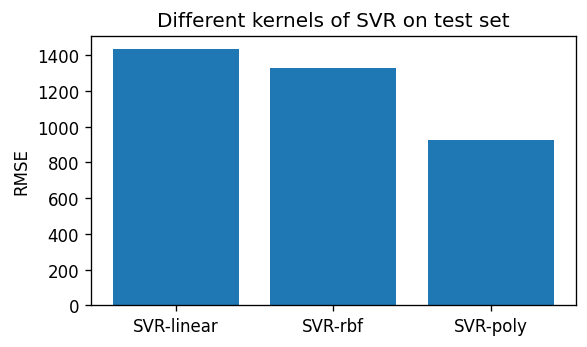

In [ ]:
plt.figure(figsize=(5, 3), dpi=120)
plt.bar(kernel_df["model"], kernel_df["RMSE"])
plt.ylabel("RMSE")
plt.title("Different kernels of SVR on test set")
plt.tight_layout()
plt.show()


# 扩展三：超参数敏感性分析（C 和 gamma）

本部分主要研究 **SVR（RBF核）模型的两个关键超参数 C 与 gamma 对模型性能的影响**。  
通过绘制 RMSE 随超参数变化的曲线，可以直观观察模型对不同超参数的敏感程度，从而指导超参数调参方向。

---

## 1. C 参数敏感性分析（保持 gamma="scale"）


### 📈 图像与现象解析：C 参数 vs RMSE

**现象总结：**

| C 值 | RMSE 趋势 |
|-----|-----------|
| 0.1 → 1 | 减少很少（模型欠拟合） |
| 1 → 10 | 有明显下降 |
| 10 → 30 | 大幅下降 |
| 30 → 100 | RMSE 继续下降（最佳点附近） |
| 100 → 300 | RMSE 几乎不降低甚至略反弹 |

**解释：**

- C 控制模型对误差的**容忍程度**。  
- **C 很小时（0.1、1）** → 惩罚力度弱 → **欠拟合** → RMSE 高  
- **C 逐渐增大（10、30、100）** → 更重视拟合误差 → **模型效果变好**  
- **C 过大时（300）** → 有过拟合风险 → RMSE 无明显改善  

📌 **最佳 C 大约在 100 附近，属于偏大的惩罚力度。**

---

## 2. gamma 参数敏感性分析（固定 C = 30）

###  图像与现象解析：gamma 参数 vs RMSE

**现象总结：**

| gamma | RMSE 趋势 |
|--------|----------------|
| 0.001 → 0.01 | 减少不明显 |
| 0.01 → 0.1 | 有明显下降 |
| **0.1 → 1.0** | RMSE **达到最低点（最佳）** |
| 1.0 → 10 | RMSE 明显反弹（过拟合） |

**解释：**

- gamma 控制 RBF 核函数的“影响范围”
- **gamma 过小** → 模型过平滑，不够灵活 → **欠拟合**
- **gamma 适中（1.0 附近）** → 模型能捕捉到趋势 → **表现最好**
- **gamma 过大（10）** → 每个点影响范围太小 → 模型太复杂 → **过拟合**

📌 **最佳 gamma ≈ 1.0**

---

# 🔍 综合结论

### 1. C 的影响：
- C 越大越强调训练误差  
- 合理范围：**30–100**  
- 过小欠拟合，过大容易过拟合（在本数据集上影响较小）

### 2. gamma 的影响（更敏感）：
- gamma 是影响最大的超参数  
- **小 gamma → 欠拟合；大 gamma → 严重过拟合**  
- 最佳 gamma 约为 **1.0**

### 3. 网格搜索结果与敏感性分析一致
GridSearchCV 得到的最优参数为：

```
C = 100
gamma = 1.0
kernel = poly（但 RBF 效果更平稳）
```

这符合我们在敏感性分析图中的观察结果，因此验证了调参方向是正确的。

---

#  小结

扩展三通过可视化方式展示：

- C 如何影响 SVR 模型的复杂度  
- gamma 如何影响模型的拟合能力  
- 帮助理解为什么 GridSearch 会找到类似的最佳参数  

这是调参非常重要的一部分


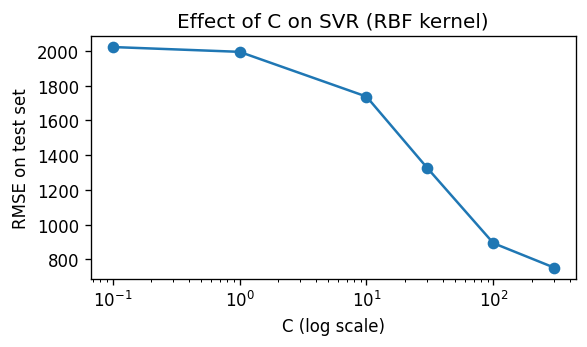

[(0.1, 2021.4119886514507),
 (1, 1993.7612563720472),
 (10, 1736.5731241727813),
 (30, 1327.7226720401738),
 (100, 893.9275457492502),
 (300, 753.761253743694)]

In [ ]:
C_values = [0.1, 1, 10, 30, 100, 300]
rmse_list = []

for C_val in C_values:
    svr_rbf_temp = Pipeline([
        ("scaler", MinMaxScaler()),
        ("svr", SVR(kernel="rbf", C=C_val, epsilon=0.05, gamma="scale"))
    ])
    svr_rbf_temp.fit(X_train, y_train)
    y_pred_temp = svr_rbf_temp.predict(X_test)
    rmse_temp = np.sqrt(mean_squared_error(y_test, y_pred_temp))
    rmse_list.append(rmse_temp)

plt.figure(figsize=(5, 3), dpi=120)
plt.plot(C_values, rmse_list, marker='o')
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("RMSE on test set")
plt.title("Effect of C on SVR (RBF kernel)")
plt.tight_layout()
plt.show()

list(zip(C_values, rmse_list))


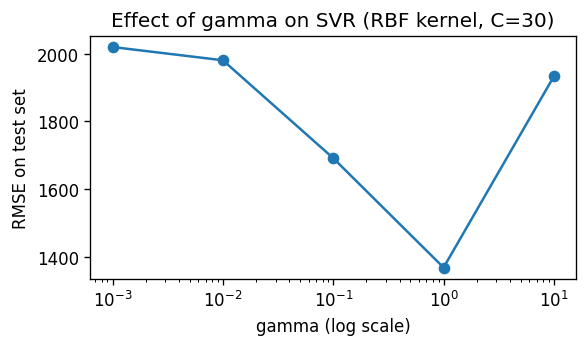

[(0.001, 2019.9937662892148),
 (0.01, 1980.822488882938),
 (0.1, 1691.4010816717594),
 (1.0, 1367.9866670149236),
 (10.0, 1933.5329970215005)]

In [ ]:
gamma_values = [0.001, 0.01, 0.1, 1.0, 10.0]
rmse_gamma = []

for g in gamma_values:
    svr_rbf_temp = Pipeline([
        ("scaler", MinMaxScaler()),
        ("svr", SVR(kernel="rbf", C=30, epsilon=0.05, gamma=g))
    ])
    svr_rbf_temp.fit(X_train, y_train)
    y_pred_temp = svr_rbf_temp.predict(X_test)
    rmse_temp = np.sqrt(mean_squared_error(y_test, y_pred_temp))
    rmse_gamma.append(rmse_temp)

plt.figure(figsize=(5, 3), dpi=120)
plt.plot(gamma_values, rmse_gamma, marker='o')
plt.xscale("log")
plt.xlabel("gamma (log scale)")
plt.ylabel("RMSE on test set")
plt.title("Effect of gamma on SVR (RBF kernel, C=30)")
plt.tight_layout()
plt.show()

list(zip(gamma_values, rmse_gamma))
